# Introduction to the workflow structure

This notebook gives a brief overview of the workflow structure and introduce some useful DataJoint tools to facilitate the exploration.
+ DataJoint needs to be pre-configured before running this notebook, if you haven't set up the configuration, refer to notebook [00-Set-up-configuration](00-Set-up-configuration.ipynb).
+ If you are familar with DataJoint and the workflow structure, proceed to the next notebook [02-process-ephys-workflow](02-process-ephys-workflow.ipynb) directly to run the workflow.
+ For a more thorough introduction of DataJoint functionings, please visit our [datajoint tutorial site](https://playground.datajoint.io) or [tutorials for BrainCogs U19 team](../tutorials/202103)

To load the local configuration, we will change the directory to the package root.

In [1]:
from scripts.conf_file_finding import try_find_conf_file
try_find_conf_file()

Local configuration file found !!, no need to run the configuration (unless configuration has changed)


In [2]:
import os

## Ephys related schemas and tables

The current workflow is composed of multiple database schemas, each of them corresponds to a module within the database.

Some of the schemas and tables are from `u19_pipeline`, and the ephys related schemas are from the [DataJoint Array Ephys Element](https://github.com/datajoint/element-array-ephys) installed in `u19_pipeline`.

In [3]:
import datajoint as dj
from u19_pipeline import subject, acquisition, ephys_pipeline
from u19_pipeline.ephys_pipeline import probe_element, ephys_element

[2024-09-05 14:54:50,969][INFO]: Connecting alvaros@datajoint00.pni.princeton.edu:3306
[2024-09-05 14:54:52,802][INFO]: Connected alvaros@datajoint00.pni.princeton.edu:3306


+ Each module contains a schema object that enables interaction with the schema in the database.
+ The module `ephys` is the native 

In [4]:
probe_element.schema

Schema `u19_pipeline_probe_element`

In [5]:
ephys_element.schema

Schema `u19_pipeline_ephys_element`

+ The table classes in the module corresponds to a table in the schema in the database.

In [6]:
# preview table columns and contents in a table
ephys_element.EphysRecording()

recording_id Unique number assigned to recording,insertion_number,electrode_config_hash,acq_software,sampling_rate (Hz),recording_datetime datetime of the recording from this probe,recording_duration (seconds) duration of the recording from this probe
30,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-06 16:43:03,5573.93
30,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-06 16:43:03,5573.94
31,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-07 10:17:10,4984.81
31,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-07 10:17:10,4984.82
32,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-05 12:33:54,5309.66
32,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-05 12:33:54,5309.66
33,0,6f804b5c-d978-45e0-4653-d6ba8682a5bf,SpikeGLX,30000.4,2021-05-06 14:08:55,5067.46
34,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-07 13:31:30,4803.81
34,1,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-07 13:31:30,4803.81
35,0,6f6d8149-1603-9d2c-f884-0fdf995ec8b3,SpikeGLX,30000.7,2021-05-08 12:05:31,5347.0


+ By importing the modules for the first time, the schemas and tables will be created inside the database.
+ Once created, importing modules will not create schemas and tables again, but the existing schemas/tables can be accessed and manipulated by the modules.

## DataJoint tools to explore schemas and tables

+ `dj.list_schemas()`: list all schemas a user has access to in the current database

In [7]:
dj.list_schemas()

['aarusso_pipeline',
 'aarusso_puffs',
 'aarusso_puffs_py',
 'aarusso_tutorial',
 'abondy_tutorial',
 'ahoag_BrainSharer',
 'ahoag_admin_demo',
 'ahoag_admin_flask_demo',
 'ahoag_admin_test',
 'ahoag_appcore_copy',
 'ahoag_brainsharer_test',
 'ahoag_celery_test',
 'ahoag_debugjoin',
 'ahoag_lab_test',
 'ahoag_lightsheet_copy',
 'ahoag_lightsheet_demo',
 'ahoag_lightsheet_test',
 'ahoag_microscope_demo',
 'ahoag_microscope_demo_old',
 'ahoag_microscope_test',
 'ahoag_mouselight_test',
 'ahoag_puffs_acquisition_demo',
 'ahoag_puffs_behavior_demo',
 'ahoag_puffs_lab_demo',
 'ahoag_spockadmin_copy',
 'ahoag_spockadmin_demo',
 'ahoag_spockadmin_test',
 'ahoag_subject_test',
 'ahoag_test',
 'ahoag_test2',
 'ahoag_test3',
 'ahoag_test4',
 'ahoag_test5',
 'ahoag_test6',
 'ahoag_test_db',
 'ahoag_test_django',
 'ahoag_tutorial',
 'alvaros_behavior',
 'alvaros_cosecha_colectiva',
 'alvaros_ephys_element_test',
 'alvaros_ephys_pipeline_test',
 'alvaros_imaging_element_test',
 'alvaros_imaging_pip

+ `dj.Diagram()`: plot tables and dependencies. 

In [8]:
# plot diagram for all tables in a schema
dj.Diagram(ephys_element)

ValueError: Node names and attributes should not contain ":" unless they are quoted with "".                    For example the string 'attribute:data1' should be written as '"attribute:data1"'.                    Please refer https://github.com/pydot/pydot/issues/258

**Table tiers**: 

Manual table: green box, manually inserted table, expect new entries daily, e.g. Subject, ProbeInsertion.  
Lookup table: gray box, pre inserted table, commonly used for general facts or parameters. e.g. Strain, ClusteringMethod, ClusteringParamSet.  
Imported table: blue oval, auto-processing table, the processing depends on the importing of external files. e.g. process of Clustering requires output files from kilosort2.  
Computed table: red circle, auto-processing table, the processing does not depend on files external to the database, commonly used for data analyses.     
Part table: plain text, as an appendix to the master table, all the part entries of a given master entry represent a intact set of the master entry. e.g. Unit of a CuratedClustering.

**Dependencies**:  

One-to-one primary: thick solid line, share the exact same primary key, meaning the child table inherits all the primary key fields from the parent table as its own primary key.     
One-to-many primary: thin solid line, inherit the primary key from the parent table, but have additional field(s) as part of the primary key as well
secondary dependency: dashed line, the child table inherits the primary key fields from parent table as its own secondary attribute.

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


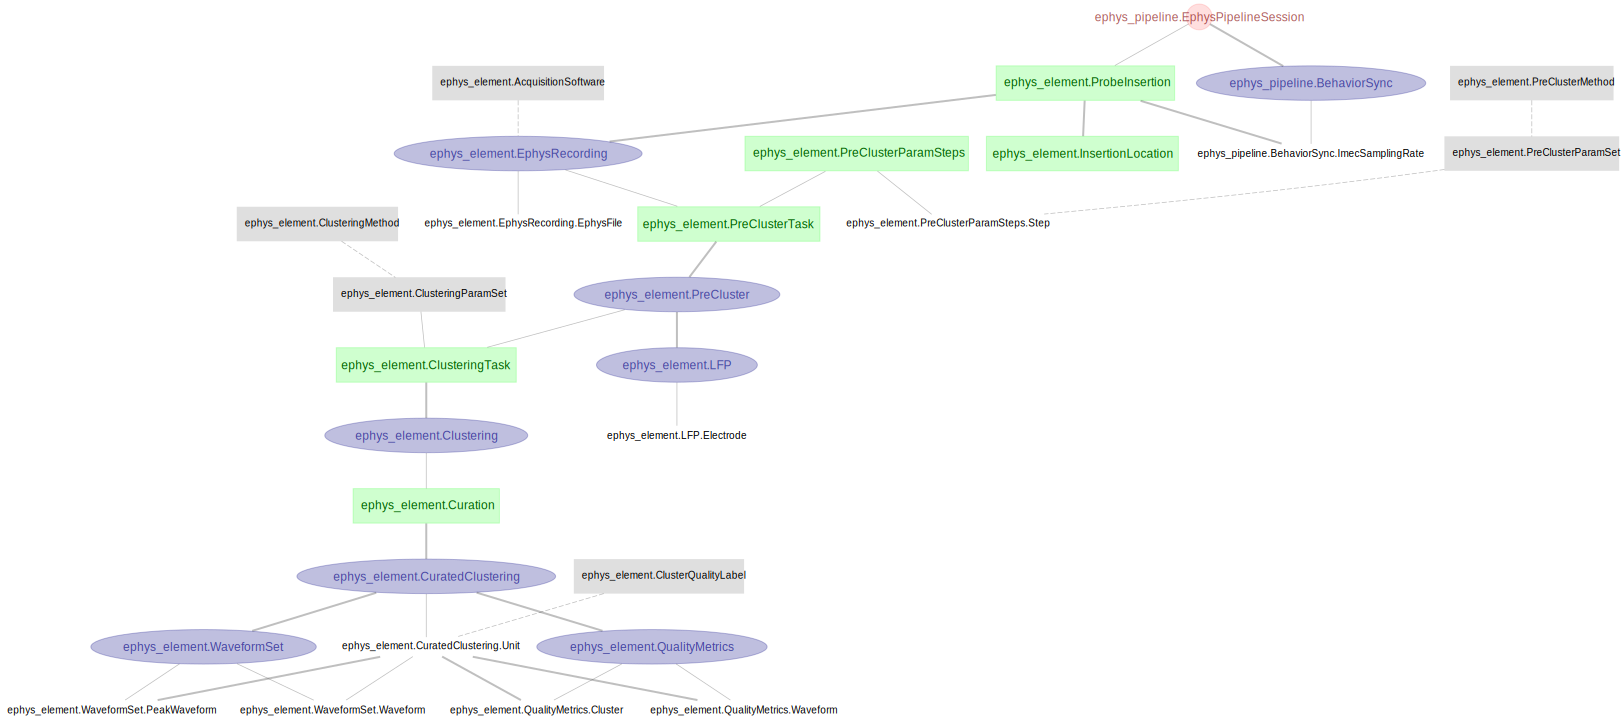

In [12]:
# plot diagram of tables in multiple schemas
#dj.Diagram(subject) + dj.Diagram(acquisition) + dj.Diagram(ephys_pipeline) + dj.Diagram(ephys_element)
#dj.Diagram(acquisition)
dj.Diagram(ephys_pipeline) + dj.Diagram(ephys_element)

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future vers

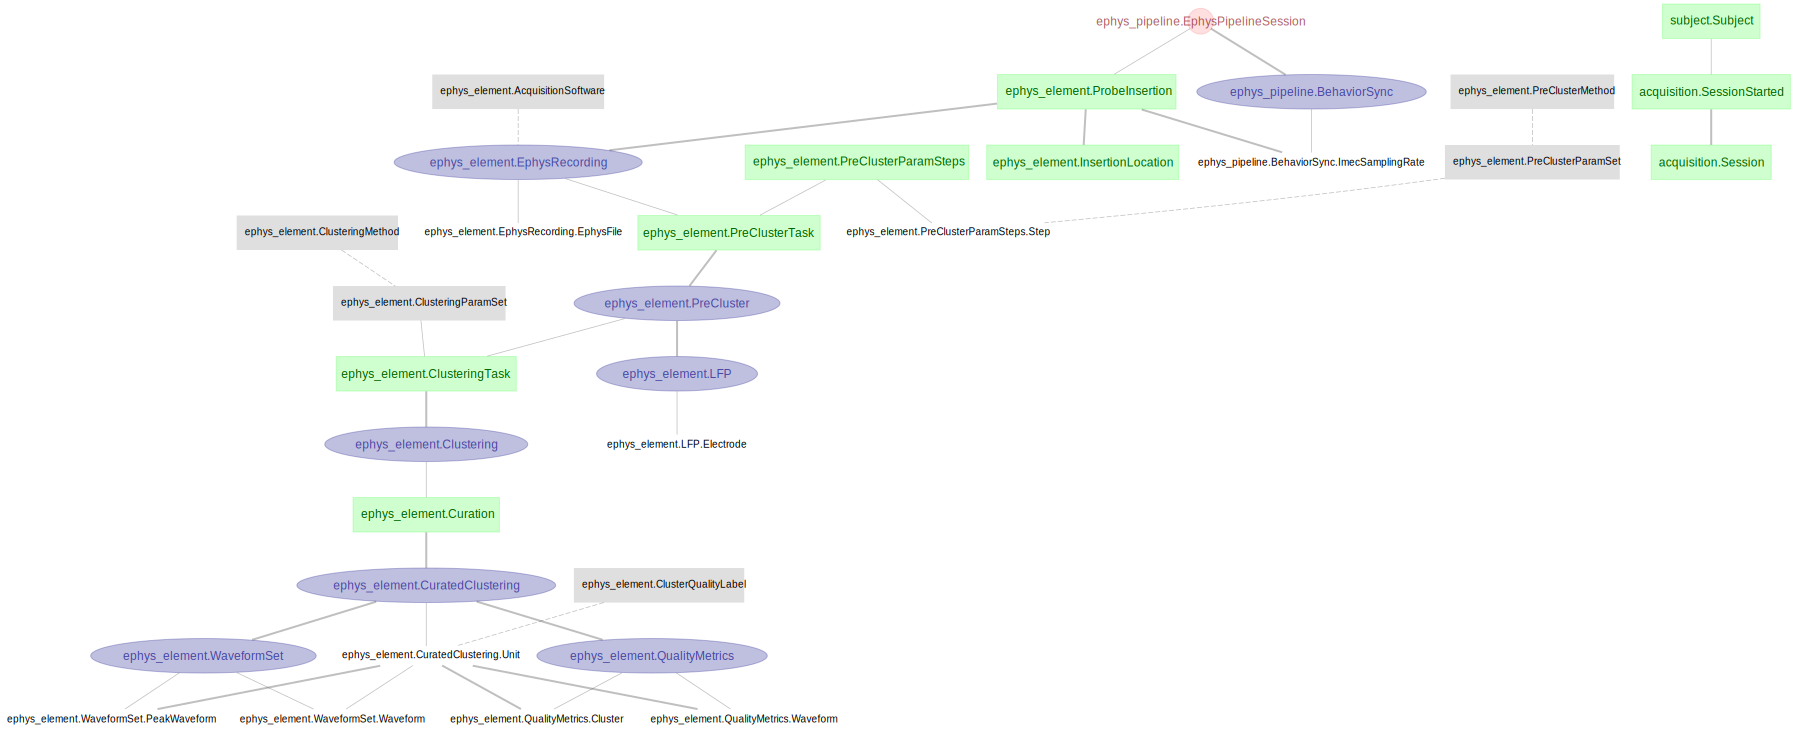

In [13]:
# plot diagram of selected tables and schemas
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(ephys_pipeline) + dj.Diagram(ephys_element)

In [14]:
# plot diagram with 1 additional level of dependency downstream
dj.Diagram(subject.Subject) + 1

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


DataJointError: Class AcquisitionSoftware is not properly declared (schema decorator not applied?)

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


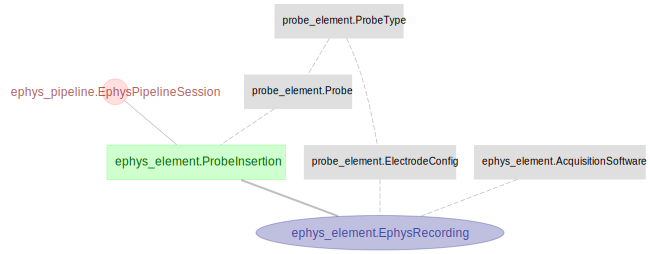

In [15]:
# plot diagram with 2 additional levels of dependency upstream
dj.Diagram(ephys_element.EphysRecording) - 2

+ `describe()`: show table definition with foreign key references.

In [16]:
ephys_element.EphysRecording.describe()

# Ephys recording from a probe insertion for a given session.
-> ephys_element.ProbeInsertion
---
-> probe_element.ElectrodeConfig
-> ephys_element.AcquisitionSoftware
sampling_rate        : float                        # (Hz)
recording_datetime   : datetime                     # datetime of the recording from this probe
recording_duration   : float                        # (seconds) duration of the recording from this probe



'# Ephys recording from a probe insertion for a given session.\n-> ephys_element.ProbeInsertion\n---\n-> probe_element.ElectrodeConfig\n-> ephys_element.AcquisitionSoftware\nsampling_rate        : float                        # (Hz)\nrecording_datetime   : datetime                     # datetime of the recording from this probe\nrecording_duration   : float                        # (seconds) duration of the recording from this probe\n'

+ `heading`: show attribute definitions regardless of foreign key references

In [17]:
ephys_element.EphysRecording.heading

# Ephys recording from a probe insertion for a given session.
recording_id         : int                          # Unique number assigned to recording
insertion_number     : tinyint unsigned             # 
---
electrode_config_hash : uuid                         # 
acq_software         : varchar(24)                  # 
sampling_rate        : float                        # (Hz)
recording_datetime   : datetime                     # datetime of the recording from this probe
recording_duration   : float                        # (seconds) duration of the recording from this probe

# Major tables for the ephys workflow

/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


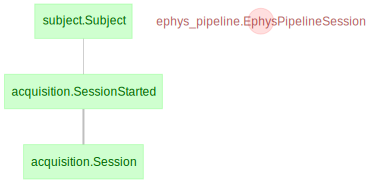

In [19]:
# subject, session, and ephys session
dj.Diagram(subject.Subject) + dj.Diagram(acquisition.Session) + dj.Diagram(ephys_pipeline.EphysPipelineSession)

In [20]:
subject.Subject.describe()

subject_fullname     : varchar(64)                  # username_mouse_nickname
---
subject_nickname     : varchar(16)                  
-> subject.lab.User
genomics_id=null     : int                          # number from the facility
sex="Unknown"        : enum('Male','Female','Unknown') # sex
dob=null             : date                         # birth date
head_plate_mark=null : blob                         # little drawing on the head plate for mouse identification
location             : varchar(32)                  
protocol=null        : varchar(16)                  # protocol number
line=null            : varchar(128)                 # name
subject_description="" : varchar(255)                 # description
initial_weight=null  : float                        
notification_enabled=1 : tinyint                      
need_reweight=0      : tinyint                      
INDEX (location)
INDEX (protocol)
INDEX (line)



/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


'subject_fullname     : varchar(64)                  # username_mouse_nickname\n---\nsubject_nickname     : varchar(16)                  \n-> subject.lab.User\ngenomics_id=null     : int                          # number from the facility\nsex="Unknown"        : enum(\'Male\',\'Female\',\'Unknown\') # sex\ndob=null             : date                         # birth date\nhead_plate_mark=null : blob                         # little drawing on the head plate for mouse identification\nlocation             : varchar(32)                  \nprotocol=null        : varchar(16)                  # protocol number\nline=null            : varchar(128)                 # name\nsubject_description="" : varchar(255)                 # description\ninitial_weight=null  : float                        \nnotification_enabled=1 : tinyint                      \nneed_reweight=0      : tinyint                      \nINDEX (location)\nINDEX (protocol)\nINDEX (line)\n'

In [21]:
acquisition.SessionStarted.describe()

# General information of a session
-> subject.Subject
session_date         : date                         # date of experiment
session_number       : int                          # number
---
session_start_time="current_timestamp()" : datetime                     # start time
-> subject.lab.Location.proj(session_location="location")
-> acquisition.task.Task
local_path_behavior_file : varchar(255)                 # Path were session file is stored in local computer
remote_path_behavior_file : varchar(255)                 # Path were session file will be stored in bucket
new_remote_path_behavior_file : varchar(255)                 # Unified Path were session file will be stored in cup
is_finished=0        : tinyint                      # Flag that indicates if this session was finished successfully
invalid_session=0    : tinyint                      # Flag that indicates if behavioral file couldn't be saved for the session
%}



'# General information of a session\n-> subject.Subject\nsession_date         : date                         # date of experiment\nsession_number       : int                          # number\n---\nsession_start_time="current_timestamp()" : datetime                     # start time\n-> subject.lab.Location.proj(session_location="location")\n-> acquisition.task.Task\nlocal_path_behavior_file : varchar(255)                 # Path were session file is stored in local computer\nremote_path_behavior_file : varchar(255)                 # Path were session file will be stored in bucket\nnew_remote_path_behavior_file : varchar(255)                 # Unified Path were session file will be stored in cup\nis_finished=0        : tinyint                      # Flag that indicates if this session was finished successfully\ninvalid_session=0    : tinyint                      # Flag that indicates if behavioral file couldn\'t be saved for the session\n%}\n'

In [22]:
acquisition.Session.describe()

-> acquisition.SessionStarted
---
session_start_time   : datetime                     # start time
session_end_time=null : datetime                     # end time
-> subject.lab.Location.proj(session_location="location")
-> acquisition.task.TaskLevelParameterSet
stimulus_bank=""     : varchar(255)                 # path to the function to generate the stimulus
stimulus_commit=""   : varchar(64)                  # git hash for the version of the function
session_performance  : float                        # percentage correct on this session
num_trials=null      : int                          # Number of trials for the session
num_trials_try=null  : tinyblob                     # Accumulative number of trials for each try of the session
session_narrative="" : varchar(512)                 
session_protocol=null : varchar(255)                 # function and parameters to generate the stimulus
session_code_version=null : blob                         # code version of the stimulus, maybe a 

'-> acquisition.SessionStarted\n---\nsession_start_time   : datetime                     # start time\nsession_end_time=null : datetime                     # end time\n-> subject.lab.Location.proj(session_location="location")\n-> acquisition.task.TaskLevelParameterSet\nstimulus_bank=""     : varchar(255)                 # path to the function to generate the stimulus\nstimulus_commit=""   : varchar(64)                  # git hash for the version of the function\nsession_performance  : float                        # percentage correct on this session\nnum_trials=null      : int                          # Number of trials for the session\nnum_trials_try=null  : tinyblob                     # Accumulative number of trials for each try of the session\nsession_narrative="" : varchar(512)                 \nsession_protocol=null : varchar(255)                 # function and parameters to generate the stimulus\nsession_code_version=null : blob                         # code version of the stim

In [23]:
# saves the data directory ephys data
ephys_pipeline.EphysPipelineSession.describe()

-> ephys_pipeline.recording.Recording



/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)
/Users/alvaros/opt/anaconda3/envs/u19_datajoint_py39_env/lib/python3.9/inspect.py:351: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  value = getattr(object, key)


'-> ephys_pipeline.recording.Recording\n'

+ [`ephys_element`](https://github.com/datajoint/element-array-ephys): Neuropixel based probe and ephys information. Check [this link](https://github.com/datajoint/element-array-ephys/tree/main/element_array_ephys) for definitions of the tables

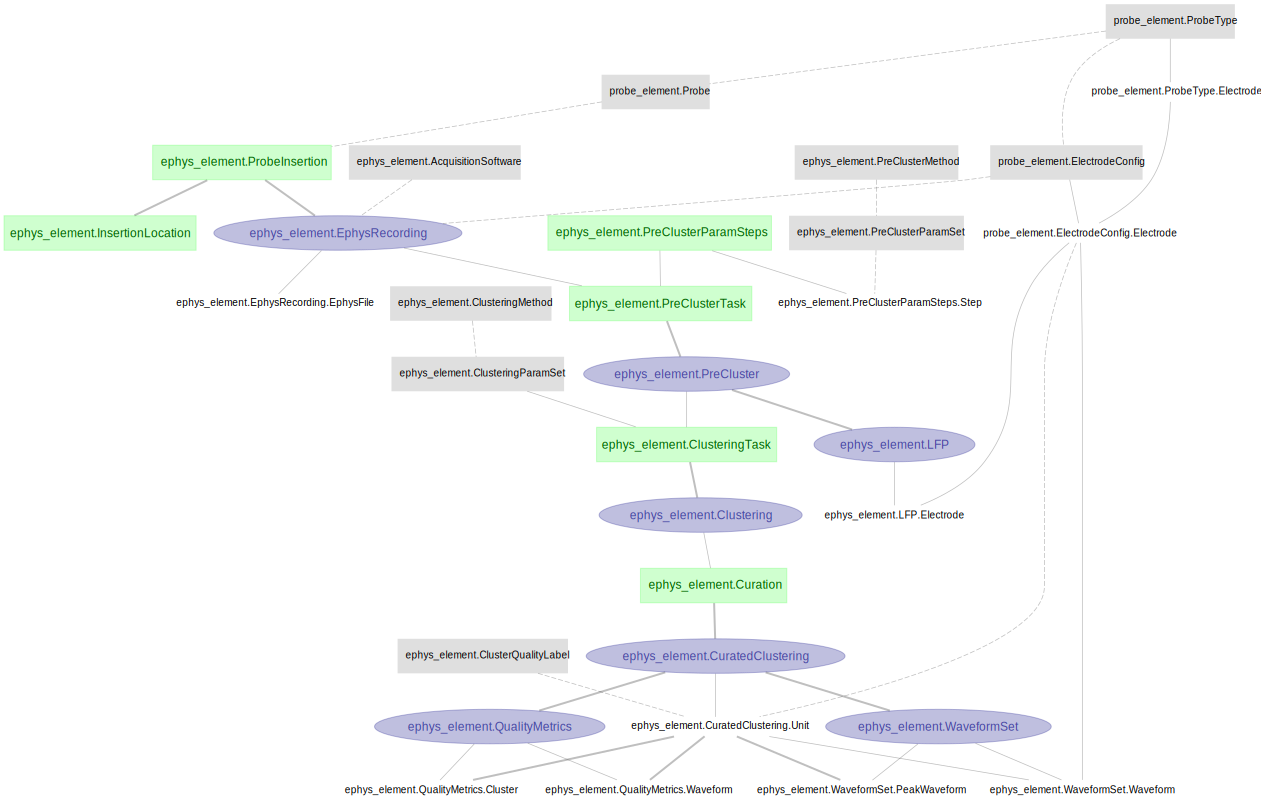

In [24]:
dj.Diagram(probe_element) + dj.Diagram(ephys_element)

## Summary and next step

+ This notebook introduced the overall structures of the schemas and tables in the workflow and relevant tools to explore the schema structure and table definitions.

+ In the next notebook [02-process-ephys-workflow](02-process-ephys-workflow.ipynb), we will further introduce the detailed steps running through the pipeline and table contents accordingly.